<a href="https://colab.research.google.com/github/amirkalateh/PracticalGrimyKeygenerator/blob/main/fmnist_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:

keras.__version__


'3.8.0'

In [ ]:
fmnist_data = keras.datasets.fashion_mnist
fmnist_data.load_data()
(x_train, y_train), (x_test, y_test) = fmnist_data.load_data()


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
print(y_train[0:10])
print(x_train[0:10])

[9 0 0 3 0 2 7 2 5 5]
[[[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 ...

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ... 180   0   0]
  [  0   0   0 ...  72   0   0]
  [  0   0   0 ...  70   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...  39   1   0]
  ...
  [  0   0   0 ... 238   0   0]
  [  0   0   0 ... 131   0   0]
  [  0

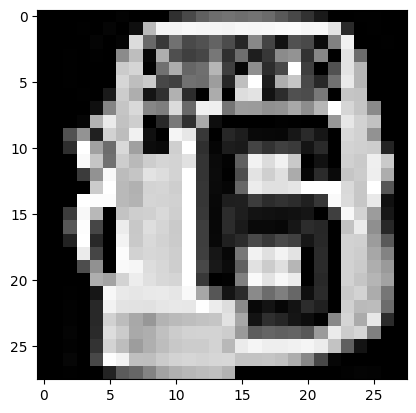

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[6000,] , cmap="gray")

In [ ]:
x_train, x_test = x_train/255.0 , x_test/255.0

In [ ]:
#the first mode
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(75, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [ ]:
#The second mode
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(10, activation="softmax")

])


In [ ]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 75)                  │           7,575 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │             760 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 86,835 (339.20 KB)

 Trainable params: 86,835 (339.20 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.layers
weights , bias =model.layers[1].get_weights()

In [ ]:
#compile
#Configures the model for training.
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])


In [ ]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9563 - loss: 0.1239 - val_accuracy: 0.8873 - val_loss: 0.3824
Epoch 2/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9595 - loss: 0.1164 - val_accuracy: 0.8874 - val_loss: 0.3823
Epoch 3/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9568 - loss: 0.1235 - val_accuracy: 0.8871 - val_loss: 0.3852
Epoch 4/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9597 - loss: 0.1142 - val_accuracy: 0.8813 - val_loss: 0.4108
Epoch 5/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9588 - loss: 0.1147 - val_accuracy: 0.8831 - val_loss: 0.4022
Epoch 6/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9582 - loss: 0.1172 - val_accuracy: 0.8870 - val_loss: 0.3823
Epoch 7/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9611 - loss: 0.1094 - val_accuracy: 0.8707 - val_loss: 0.4440
Epoch 8/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9626 - loss: 0.1073 - 

In [ ]:
print(history.history)

{'accuracy': [0.9569215774536133, 0.957725465297699, 0.9572548866271973, 0.9579803943634033, 0.9578627347946167, 0.9583725333213806, 0.9593921303749084, 0.959686279296875, 0.9597451090812683, 0.960745096206665, 0.9607254862785339, 0.9623725414276123, 0.9627646803855896, 0.9636470675468445, 0.9629019498825073, 0.963215708732605, 0.964078426361084, 0.9634313583374023, 0.963901937007904, 0.9660196304321289, 0.965137243270874, 0.9654313921928406, 0.9657647013664246, 0.9659215807914734, 0.9664902091026306, 0.966568648815155, 0.9683725237846375, 0.9669411778450012, 0.9685882329940796, 0.9689803719520569, 0.9694901704788208, 0.9700391888618469, 0.9702941179275513, 0.9708823561668396, 0.9702156782150269, 0.9700000286102295, 0.9707254767417908, 0.9714117646217346, 0.9715098142623901, 0.9711960554122925, 0.9718627333641052, 0.9726470708847046, 0.9731568694114685, 0.9730392098426819, 0.9744117856025696, 0.9734313488006592, 0.9739999771118164, 0.9752156734466553, 0.9750980138778687, 0.974941194057

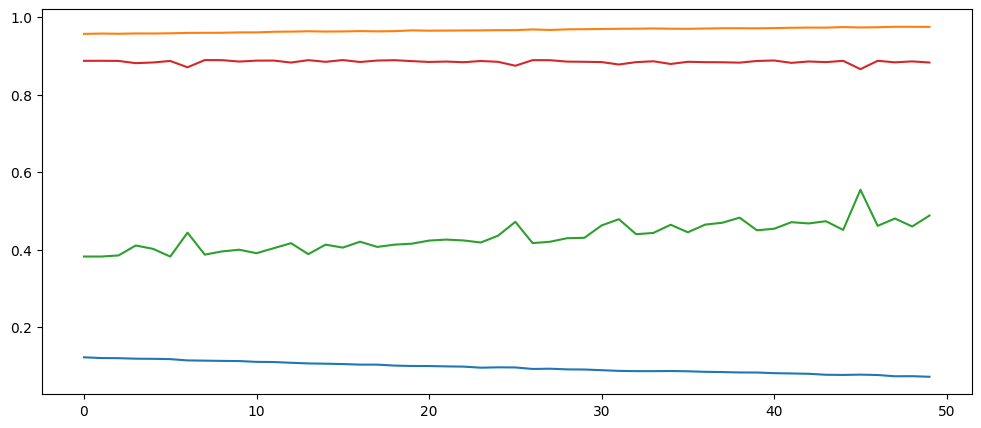

In [ ]:
fig , ax = plt.subplots(figsize = (12,5))
ax.plot(history.history["loss"])
ax.plot(history.history["accuracy"])
ax.plot(history.history["val_loss"])
ax.plot(history.history["val_accuracy"])